In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 데이터셋 준비
train_df = pd.read_csv('../data/SisFall_train.csv')  # 훈련 파일
test_df = pd.read_csv('../data/SisFall_test.csv')  # 테스트 파일

X_train = []  # 훈련 입력 데이터
y_train = []  # 훈련 출력 데이터

X_test = []  # 테스트 입력 데이터
y_test = []  # 테스트 출력 데이터

# 4개의 레코드씩 묶어서 처리
for i in range(0, len(train_df) - 39, 40):
    # gx, gy, gz 값 가져오기
    gx_values = train_df.loc[i:i+39, 'gx'].values
    gy_values = train_df.loc[i:i+39, 'gy'].values
    gz_values = train_df.loc[i:i+39, 'gz'].values

    # 레이블 값 가져오기
    labels = train_df.loc[i:i+39, 'label'].values

    # 서로 다른 레이블이 포함된 경우 해당 시퀀스는 분석에서 제외
    if len(set(labels)) == 1:
        # 시퀀스로 변환하여 입력 데이터에 추가
        X_train.append(np.transpose([gx_values, gy_values, gz_values]))

        # 레이블 값 중복 제거하여 출력 데이터에 추가
        y_train.append(labels[0])

for i in range(0, len(test_df) - 39, 40):
    # gx, gy, gz 값 가져오기
    gx_values = test_df.loc[i:i+39, 'gx'].values
    gy_values = test_df.loc[i:i+39, 'gy'].values
    gz_values = test_df.loc[i:i+39, 'gz'].values

    # 레이블 값 가져오기
    labels = test_df.loc[i:i+39, 'label'].values

    # 서로 다른 레이블이 포함된 경우 해당 시퀀스는 분석에서 제외
    if len(set(labels)) == 1:
        # 시퀀스로 변환하여 입력 데이터에 추가
        X_test.append(np.transpose([gx_values, gy_values, gz_values]))

        # 레이블 값 중복 제거하여 출력 데이터에 추가
        y_test.append(labels[0])

# 입력 데이터와 출력 데이터를 넘파이 배열로 변환
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

# 출력 데이터를 One-Hot 인코딩
label_encoder = LabelEncoder()
integer_encoded_train = label_encoder.fit_transform(y_train)
integer_encoded_train = integer_encoded_train.reshape(len(integer_encoded_train), 1)
onehot_encoder_train = OneHotEncoder(sparse_output=False)
y_train = onehot_encoder_train.fit_transform(integer_encoded_train)

integer_encoded_test = label_encoder.transform(y_test)
integer_encoded_test = integer_encoded_test.reshape(len(integer_encoded_test), 1)
onehot_encoder_test = OneHotEncoder(sparse_output=False)
y_test = onehot_encoder_test.fit_transform(integer_encoded_test)

# CNN-LSTM 모델 정의
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(40, 3)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(128))
model.add(Dense(5, activation='softmax'))

# 모델 컴파일 및 학습
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# 모델 저장
model.save('../model/saved_model_cnn_lstm')

Epoch 1/30
174/174 [==============================] - 4s 12ms/step - loss: 0.6444 - accuracy: 0.7495 - val_loss: 0.5920 - val_accuracy: 0.7477
Epoch 2/30
174/174 [==============================] - 2s 10ms/step - loss: 0.4142 - accuracy: 0.8379 - val_loss: 0.4410 - val_accuracy: 0.8169
Epoch 3/30
174/174 [==============================] - 2s 11ms/step - loss: 0.3466 - accuracy: 0.8626 - val_loss: 0.4079 - val_accuracy: 0.8449
Epoch 4/30
174/174 [==============================] - 2s 11ms/step - loss: 0.3034 - accuracy: 0.8797 - val_loss: 0.3452 - val_accuracy: 0.8721
Epoch 5/30
174/174 [==============================] - 2s 11ms/step - loss: 0.2627 - accuracy: 0.8958 - val_loss: 0.3153 - val_accuracy: 0.8798
Epoch 6/30
174/174 [==============================] - 2s 11ms/step - loss: 0.2309 - accuracy: 0.9080 - val_loss: 0.2993 - val_accuracy: 0.8938
Epoch 7/30
174/174 [==============================] - 2s 11ms/step - loss: 0.2123 - accuracy: 0.9180 - val_loss: 0.3075 - val_accuracy: 0.8854

INFO:tensorflow:Assets written to: ../model/saved_model_cnn_lstm\assets


INFO:tensorflow:Assets written to: ../model/saved_model_cnn_lstm\assets


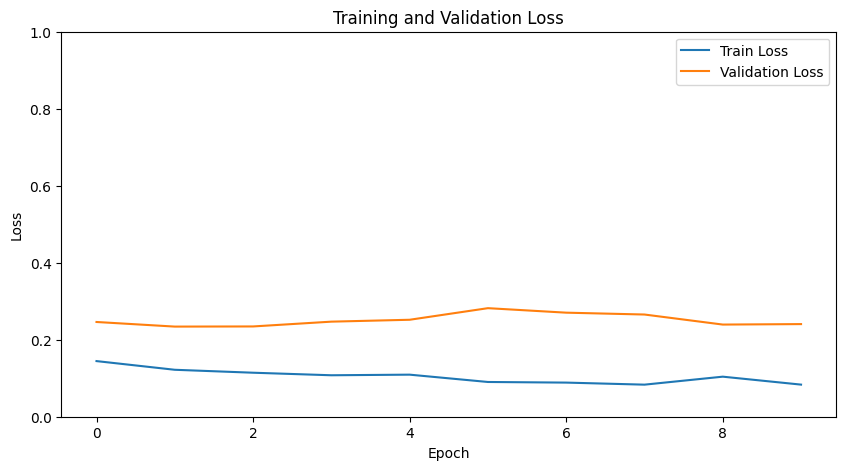

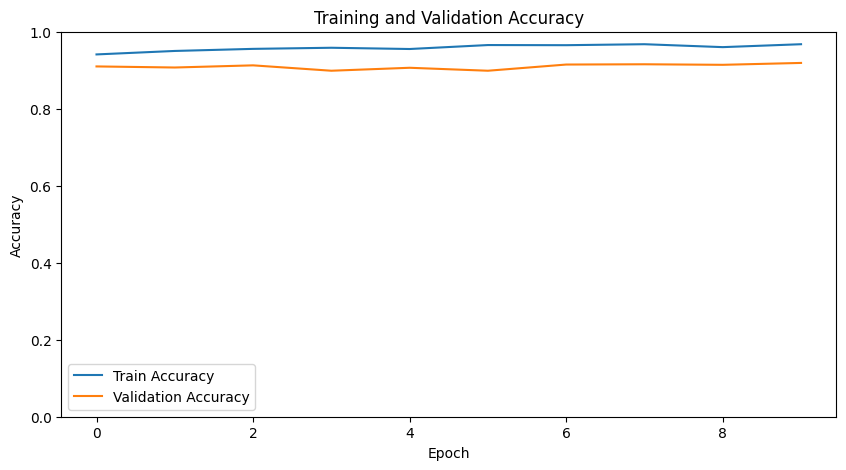

In [11]:
import matplotlib.pyplot as plt

# Get the training history
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim([0, 1])
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0, 1])
plt.show()